Chapter 15

# 二元随机数
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码生成了服从多元正态分布的样本，分别展示了标准正态分布下的独立样本，以及通过 Cholesky 分解生成的具有特定均值和协方差的样本的分布情况。

1. **生成独立标准正态样本**：
   - 设置均值向量 $\mu_z = [0, 0]$ 和协方差矩阵 $\Sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$，表示 $Z_1$ 和 $Z_2$ 是两个独立的标准正态分布随机变量。
   - 使用 `np.random.multivariate_normal` 函数生成 $500$ 个 $(Z_1, Z_2)$ 样本点，这些点服从 $\mathcal{N}(\mu_z, \Sigma_z)$。
   - 生成的 $Z_1$ 和 $Z_2$ 的分布通过 `sns.jointplot` 可视化，并绘制其联合分布的等高线和边缘分布。红色虚线表示 $Z_1$ 和 $Z_2$ 的均值位置。

2. **通过 Cholesky 分解生成多元正态样本**：
   - 设置目标分布的均值向量为 $E_X = [2, 4]$ 和协方差矩阵 $\Sigma_X = \begin{bmatrix} 4 & 2 \\ 2 & 2 \end{bmatrix}$。
   - 通过 Cholesky 分解，将协方差矩阵 $\Sigma_X$ 分解为一个下三角矩阵 $L$，使得 $\Sigma_X = LL^\top$。通过矩阵乘积 $\mathbf{X}_{\text{Chol}} = \mathbf{Z} \cdot R + \mathbf{E}_X$ 可以生成具有指定均值和协方差的样本点，其中 $R = L^\top$。
   - 将生成的 $X_{\text{Chol}}$ 样本转为数据框，并通过 `sns.jointplot` 绘制其联合分布的散点图、等高线图和边缘分布。

In [1]:
import numpy as np  # 导入数值计算库numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
import seaborn as sns  # 导入绘图库seaborn
import pandas as pd  # 导入数据处理库pandas

## 标准正态分布随机数生成与可视化

In [2]:
mu_z = [0, 0]  # 标准正态分布的均值向量
SIGMA_z = [[1, 0], 
           [0, 1]]  # 标准正态分布的协方差矩阵

In [3]:
z1, z2 = np.random.multivariate_normal(mu_z, SIGMA_z, 500).T  # 生成500个服从标准正态分布的二维数据
Z = np.matrix([z1, z2]).T  # 将数据转换为矩阵形式

In [4]:
# 转换为DataFrame以便绘图
Z_df = pd.DataFrame(data=Z, columns=["Z1", "Z2"])  # 创建数据框

## 绘制标准正态分布数据的联合分布图

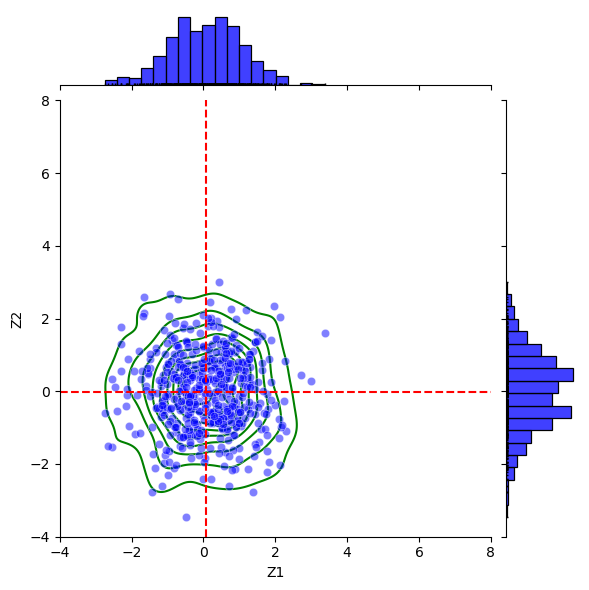

In [5]:
g = sns.jointplot(data=Z_df, x='Z1', y='Z2', 
                  alpha=0.5, color='b', 
                  xlim=(-4, 8), ylim=(-4, 8))  # 绘制散点图

g.plot_joint(sns.kdeplot, color="g", zorder=0, fill=False)  # 添加核密度估计曲线
g.plot_marginals(sns.rugplot, color="k")  # 添加边际分布的“rug”图

g.ax_joint.axvline(x=Z_df.mean()['Z1'], color='r', linestyle='--')  # 绘制Z1均值的垂直线
g.ax_joint.axhline(y=Z_df.mean()['Z2'], color='r', linestyle='--')  # 绘制Z2均值的水平线

## 使用Cholesky分解生成具有给定均值和协方差的多元正态分布数据

In [6]:
E_X = [2, 4]  # 多元正态分布的均值向量
SIGMA_X = [[4, 2], [2, 2]]  # 多元正态分布的协方差矩阵

L = np.linalg.cholesky(SIGMA_X)  # 对协方差矩阵进行Cholesky分解，得到下三角矩阵L
R = L.T  # 转置得到上三角矩阵R

In [7]:
# 使用Cholesky分解生成具有给定均值和协方差的多元正态分布数据
X_Chol = Z @ R + np.matrix([E_X])  # 通过线性变换得到X1和X2

In [8]:
# 转换为DataFrame以便绘图
X_Chol_df = pd.DataFrame(data=X_Chol, columns=["X1", "X2"])  # 创建数据框

## 绘制生成的数据的联合分布图

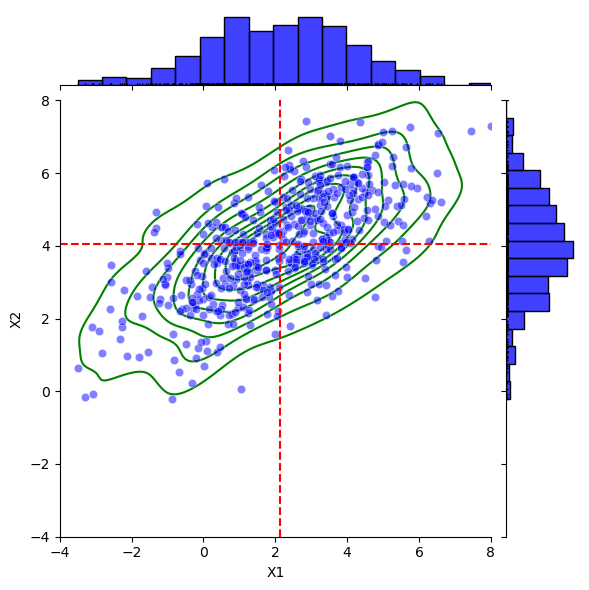

In [9]:
g = sns.jointplot(data=X_Chol_df, x='X1', y='X2', 
                  alpha=0.5, color='b',
                  xlim=(-4, 8), ylim=(-4, 8))  # 绘制散点图

g.plot_joint(sns.kdeplot, color="g", zorder=0, fill=False)  # 添加核密度估计曲线
g.plot_marginals(sns.rugplot, color="k")  # 添加边际分布的“rug”图
g.ax_joint.axvline(x=X_Chol_df.mean()['X1'], color='r', linestyle='--')  # 绘制X1均值的垂直线
g.ax_joint.axhline(y=X_Chol_df.mean()['X2'], color='r', linestyle='--')  # 绘制X2均值的水平线